In [1]:
from pathlib import Path

# Get the current working directory as a Path object
current_path = Path.cwd()
home_folder = 'evan_home'

# Traverse up the directory tree until you find the target folder
for parent in [current_path] + list(current_path.parents):
    if parent.name == home_folder:
        home_path = parent
        break
else:
    raise ValueError(f"Folder '{home_folder}' not found in the current working directory.")

print("Home Path:", home_path)
source_code_dir = home_path / 'Source_code'
dataset_dir = home_path / 'Dataset'


Home Path: c:\Users\evanlee\Documents\Bmi_NAS_evan\evan_home


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scanpy as sc
import os
import copy

c:\Users\evanlee\AppData\Local\Programs\Python\Python39\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
c:\Users\evanlee\AppData\Local\Programs\Python\Python39\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
c:\Users\evanlee\AppData\Local\Programs\Python\Python39\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_

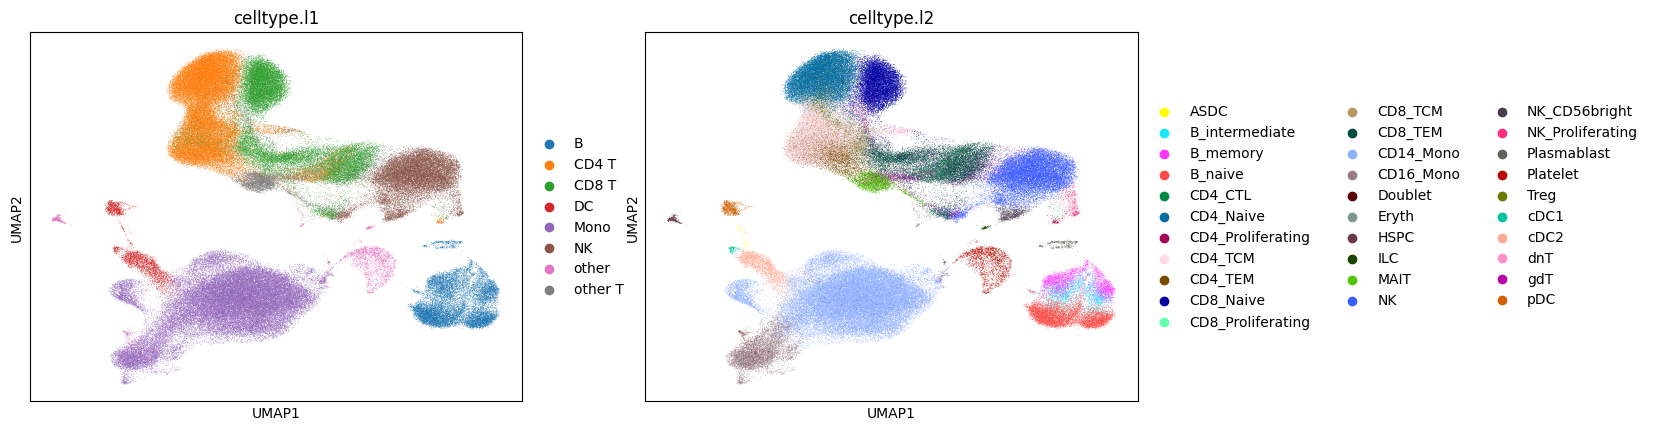

In [3]:
# adata = sc.read_h5ad('/Users/evanli/Documents/Research_datasets/PBMC_Hao/GSE164378_Hao/Harmony_noZ/Hao_Harmony_test_no_scale.h5ad')
adata = sc.read_h5ad(dataset_dir / 'PBMC_Hao/GSE164378_Hao/Harmony_noZ/Hao_Harmony_test_no_scale.h5ad')
adata.obs['celltype.l2'] = adata.obs['celltype.l2'].str.replace(' ', '_')
labels = adata.obs['celltype.l2']
types = np.unique(labels).tolist()

# UMAP embedding in adata
sc.pl.umap(adata, color=['celltype.l1', 'celltype.l2'], legend_loc="right margin")

In [4]:
adata.obs['celltype.l2'].value_counts()

celltype.l2
CD14_Mono            42690
CD4_Naive            17479
NK                   17173
CD4_TCM              14889
CD8_TEM              11727
CD8_Naive            10768
B_naive               7718
CD16_Mono             6320
CD4_TEM               4282
gdT                   3649
B_memory              3285
CD8_TCM               2883
MAIT                  2784
Treg                  2507
cDC2                  2501
B_intermediate        2431
Platelet              2293
CD4_CTL               1736
NK_CD56bright          943
pDC                    861
Doublet                605
NK_Proliferating       548
Plasmablast            366
dnT                    356
HSPC                   329
cDC1                   151
ILC                    132
CD4_Proliferating      108
CD8_Proliferating       91
Eryth                   83
ASDC                    76
Name: count, dtype: int64

ASDC


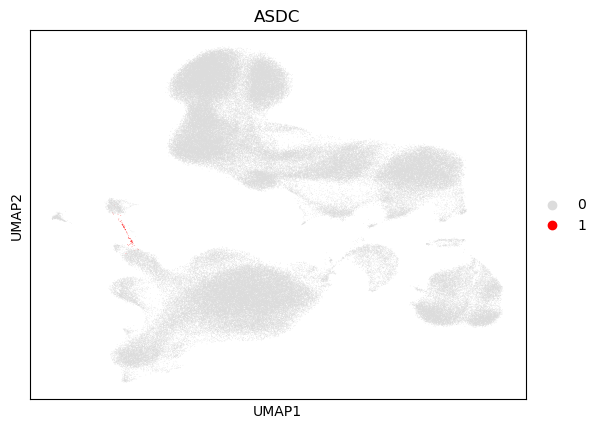

B_intermediate


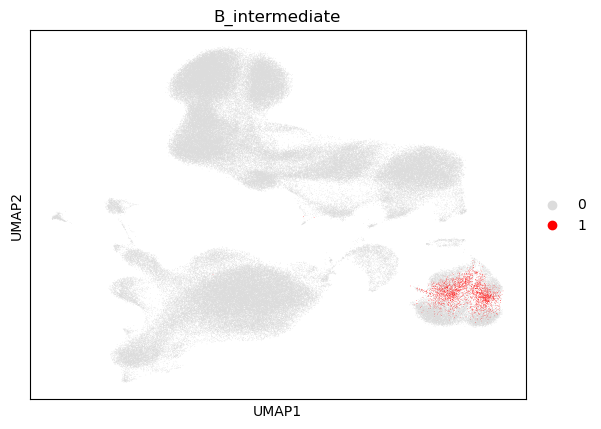

B_memory


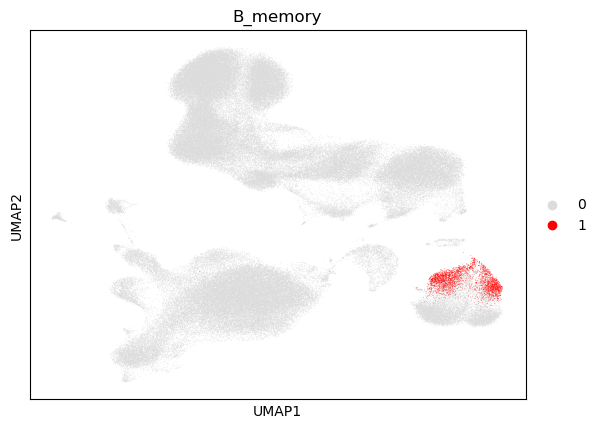

B_naive


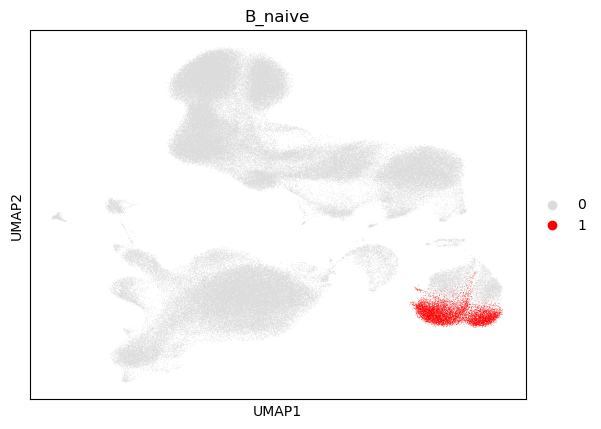

CD14_Mono


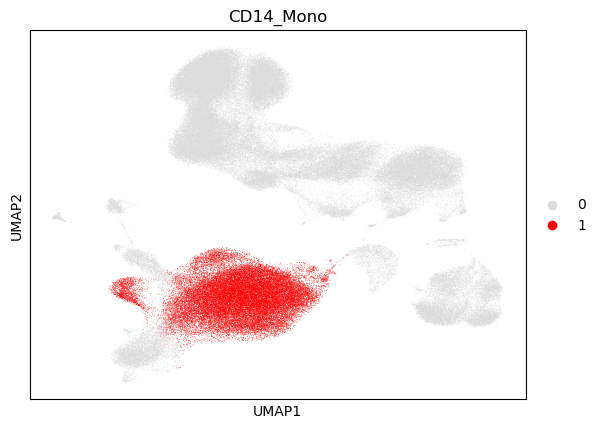

CD16_Mono


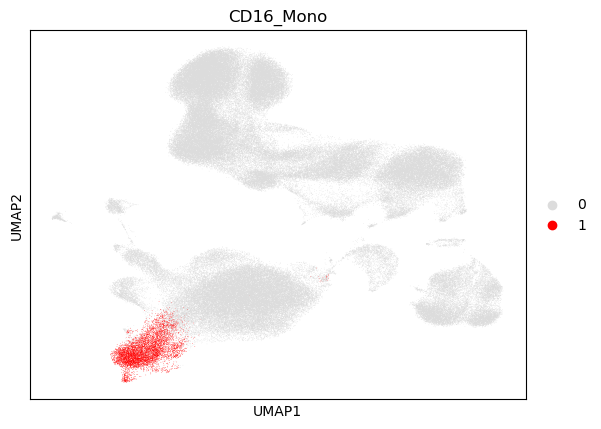

CD4_CTL


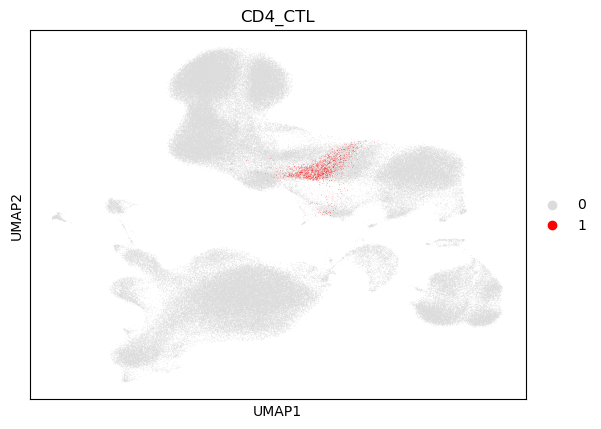

CD4_Naive


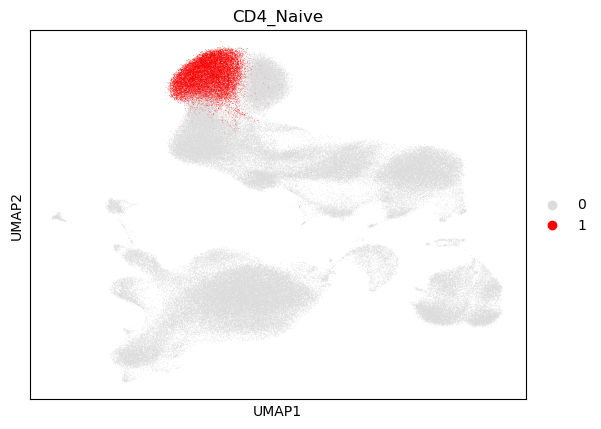

CD4_Proliferating


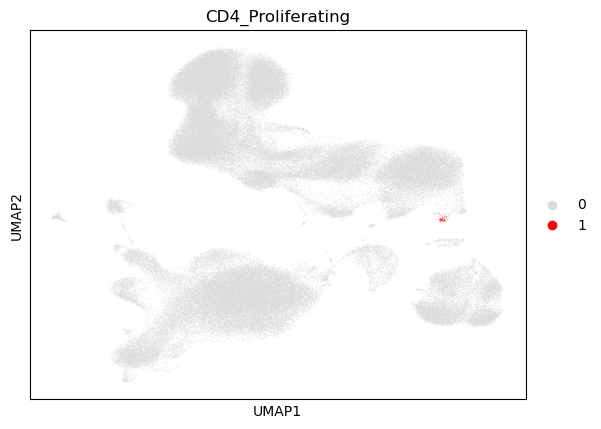

CD4_TCM


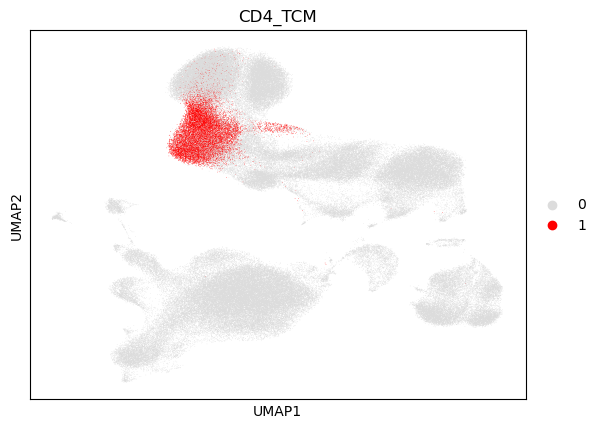

CD4_TEM


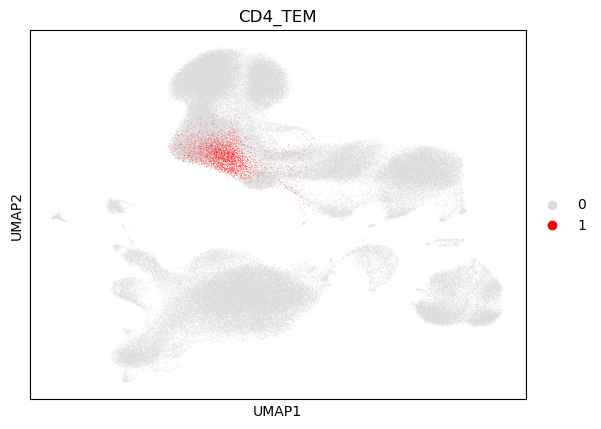

CD8_Naive


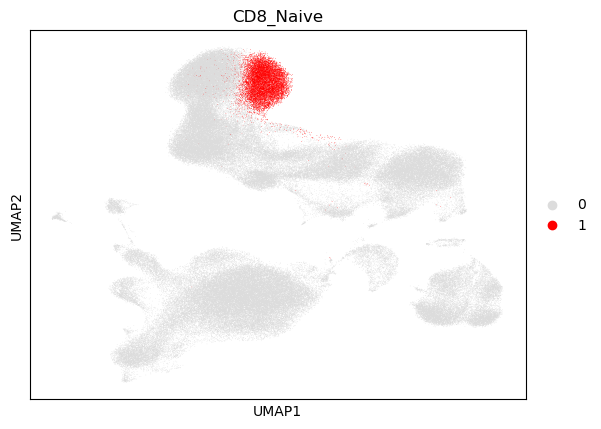

CD8_Proliferating


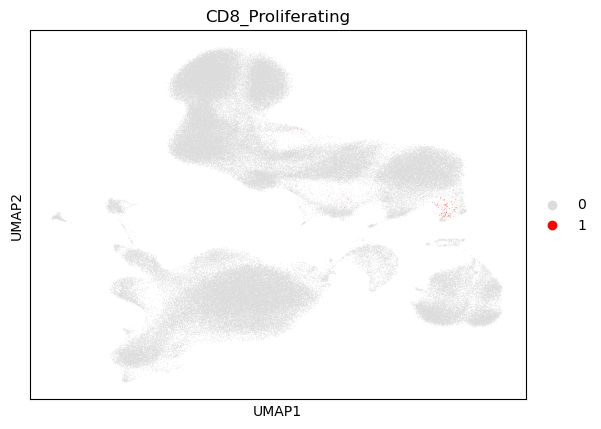

CD8_TCM


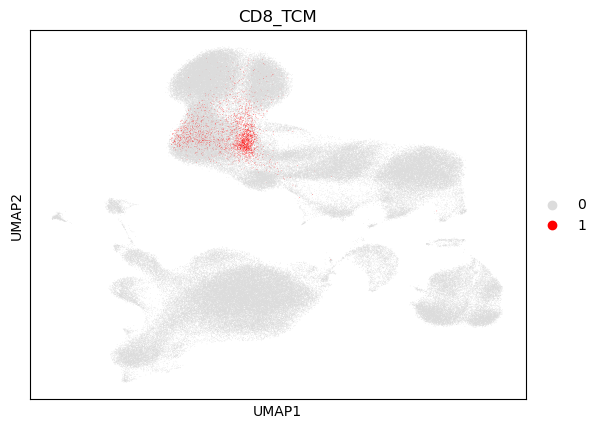

CD8_TEM


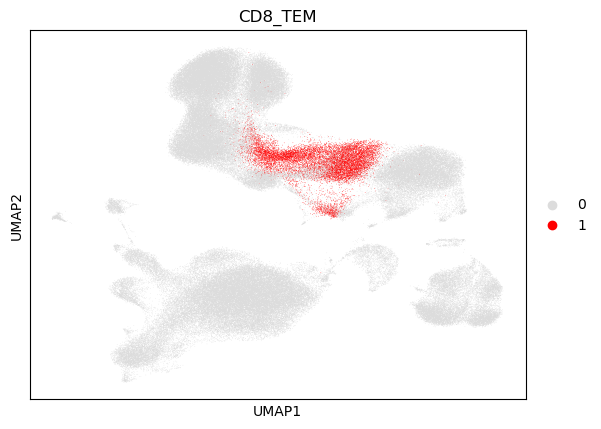

Doublet


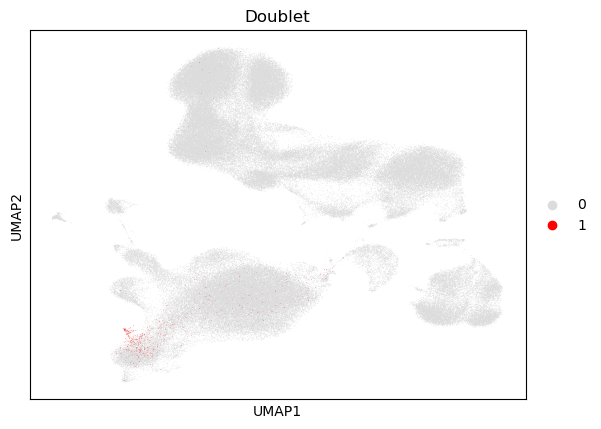

Eryth


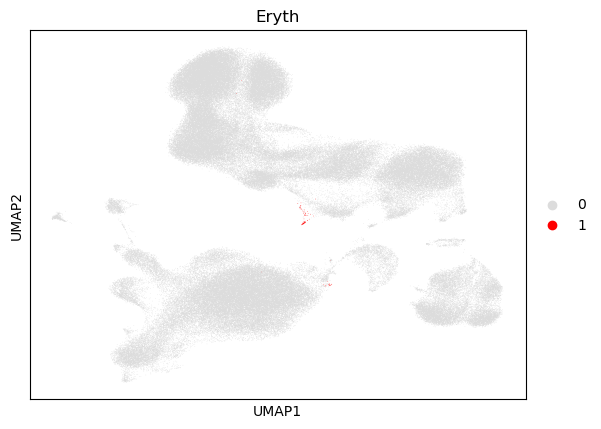

HSPC


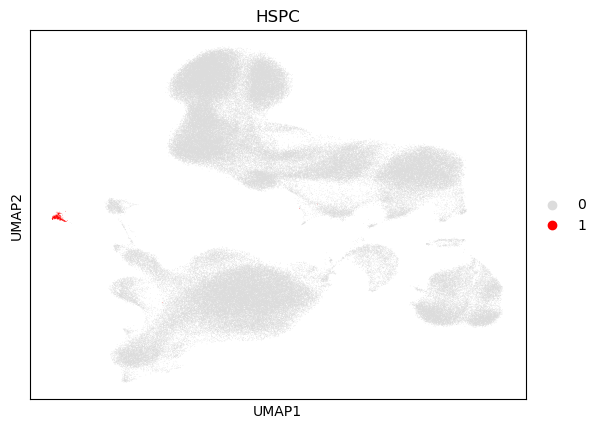

ILC


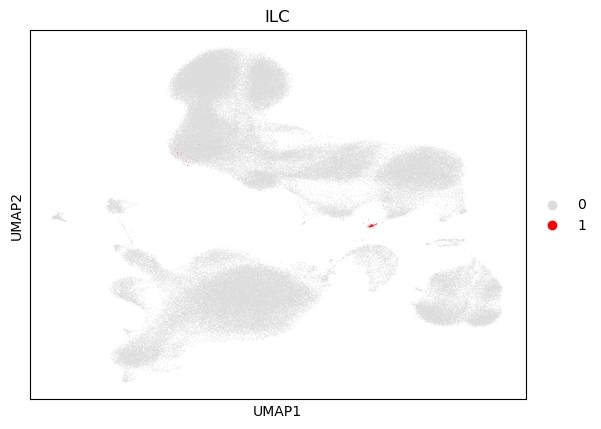

MAIT


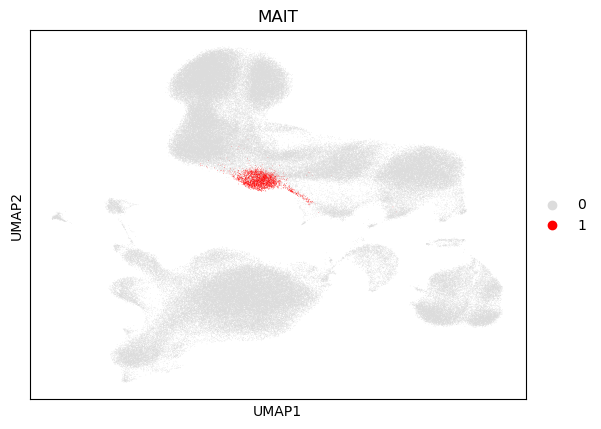

NK


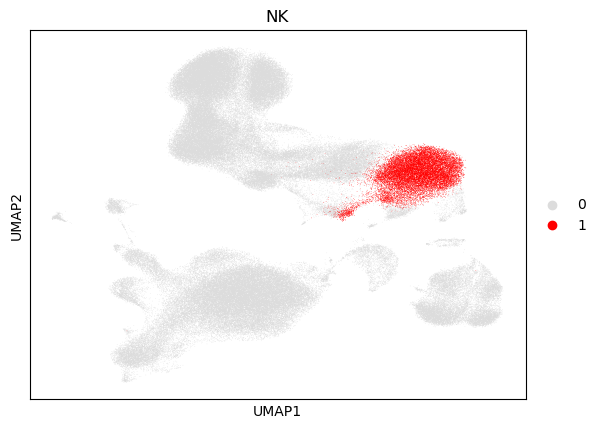

NK_CD56bright


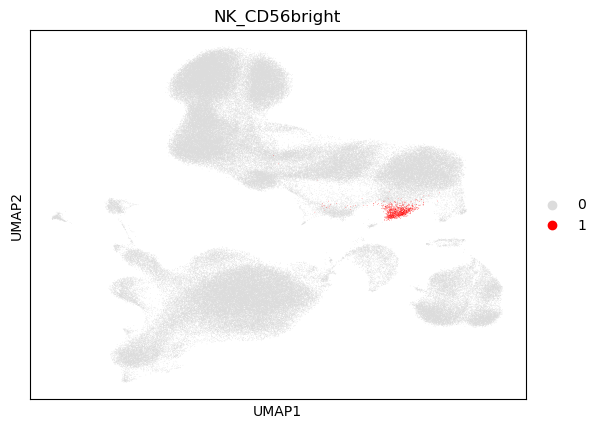

NK_Proliferating


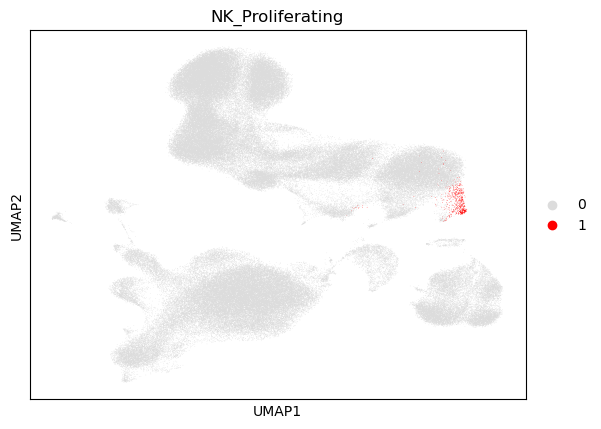

Plasmablast


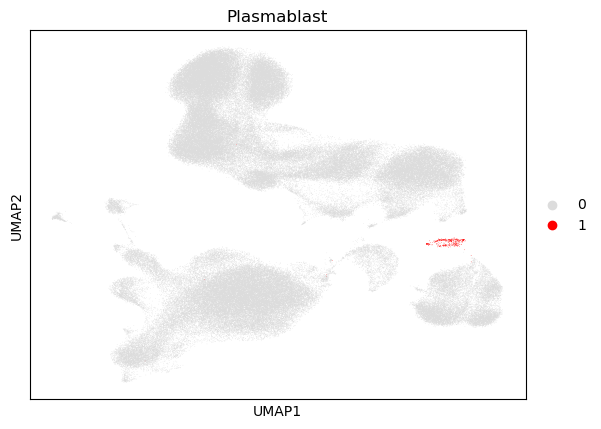

Platelet


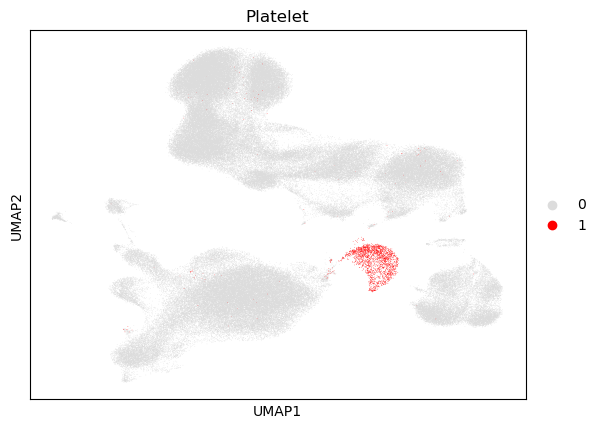

Treg


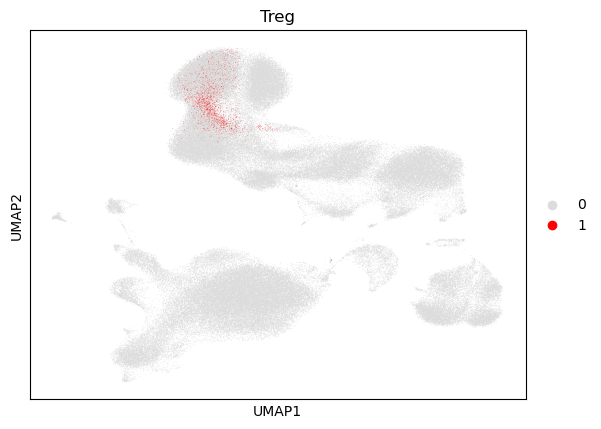

cDC1


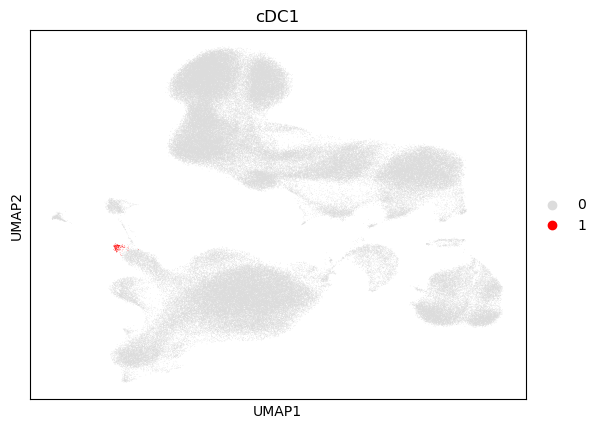

cDC2


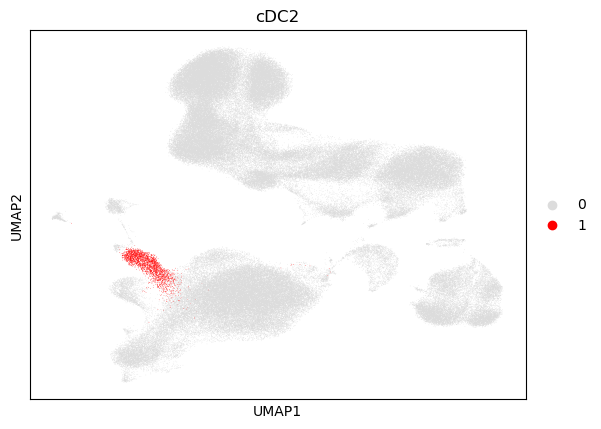

dnT


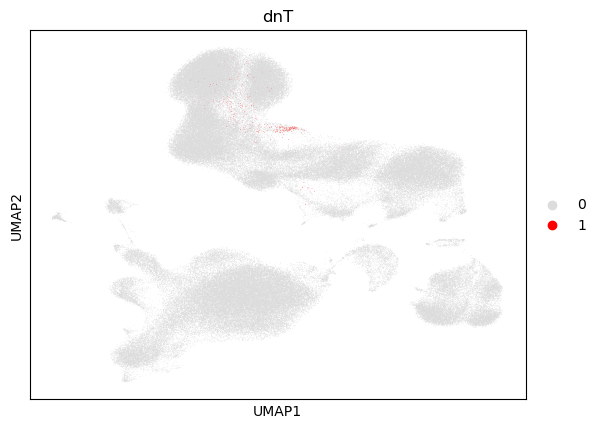

gdT


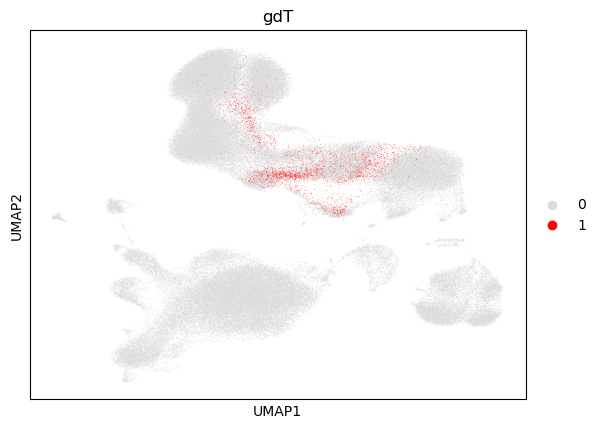

pDC


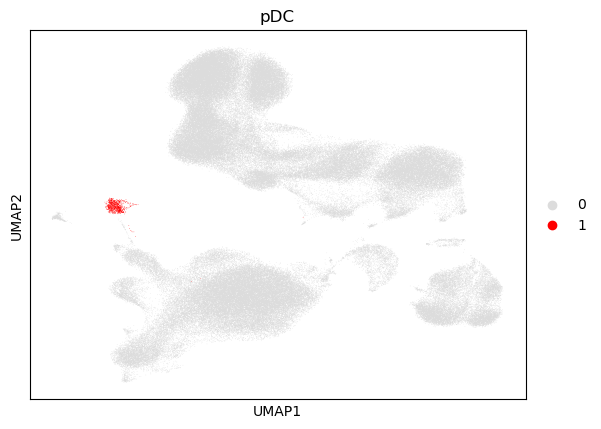

In [5]:
for celltype in types:
    print(celltype)
    temp_adata = copy.deepcopy(adata)
    binary = [1 if x == celltype else 0 for x in labels]
    temp_adata.obs['Binary'] = binary
    temp_adata.obs['Binary'] = temp_adata.obs['Binary'].astype('category')
    # print(sum(temp_adata.obs['Binary']))
    
    sc.pl.umap(temp_adata, color='Binary', palette=['#dcdcdc', 'red'], title=celltype)
    del temp_adata